In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=np.array([138,195,116,204,61,286,15,223,256,236,64,95,900,28,167,80,41,287,38,208,99,275,130,81,252,183,93,260,7,232,229,63,48,79,149,173,143,78,27,230,239,52,59,134,73,212,217,180,195,159]).reshape((-1, 1))
y=np.array([40,50,25,30,7,45,8,30,40,25,12,10,20,4,12,8,5,20,3,20,4.5,35,21,9.275,27.547,13.784,5.867,13.575,0.8,45.367,23.987,9.765,3.456,7.654,9.999,13.764,24.568,7.543,0.96,16.8,46.785,1.5,1.513,76.939,3.865,76.308,53.89,13.565,20.001,25.098])
model=LinearRegression().fit(x, y)
r_sq=model.score(x, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.14097281838460274


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x, y)
print("intercept:", model.intercept_)
print("slope:", model.coef_)

intercept: 12.398632905238648
slope: [0.05116327]


In [11]:
y_pred=model.intercept_+model.coef_*x
print("predicted response:", y_pred, sep='\n') #предсказанный ответ

predicted response:
[[19.459164  ]
 [22.37547033]
 [18.33357209]
 [22.83593975]
 [15.5195923 ]
 [27.03132779]
 [13.16608194]
 [23.80804186]
 [25.49642973]
 [24.47316435]
 [15.67308211]
 [17.25914344]
 [58.44557486]
 [13.83120443]
 [20.9428988 ]
 [16.49169441]
 [14.49632693]
 [27.08249106]
 [14.34283712]
 [23.04059282]
 [17.46379652]
 [26.46853184]
 [19.04985785]
 [16.54285768]
 [25.29177665]
 [21.7615111 ]
 [17.15681691]
 [25.7010828 ]
 [12.75677579]
 [24.26851128]
 [24.11502147]
 [15.62191884]
 [14.85446981]
 [16.44053114]
 [20.02195996]
 [21.24987841]
 [19.71498035]
 [16.38936787]
 [13.78004116]
 [24.16618474]
 [24.62665416]
 [15.05912288]
 [15.41726577]
 [19.25451093]
 [16.13355153]
 [23.2452459 ]
 [23.50106224]
 [21.6080213 ]
 [22.37547033]
 [20.53359265]]


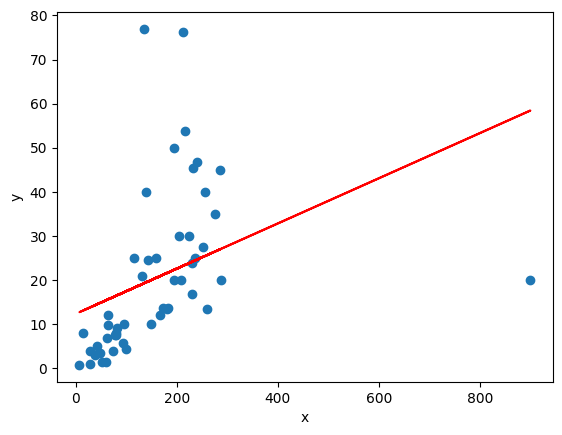

In [19]:
import matplotlib.pyplot as plt
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

In [23]:
import pandas as pd
# префикс r, чтобы избежать проблем с экранированием
data = pd.read_excel(r'C:\Users\Эльвира\Documents\3.КНИТУ\БД Большие данные\задание 3 БД\data.xlsx')
data1 = data[['x', 'y']]
print(data1)


      x       y
0   138  40.000
1   195  50.000
2   116  25.000
3   204  30.000
4    61   7.000
5   286  45.000
6    15   8.000
7   223  30.000
8   256  40.000
9   236  25.000
10   64  12.000
11   95  10.000
12  900  20.000
13   28   4.000
14  167  12.000
15   80   8.000
16   41   5.000
17  287  20.000
18   38   3.000
19  208  20.000
20   99   4.500
21  275  35.000
22  130  21.000
23   81   9.275
24  252  27.547
25  183  13.784
26   93   5.867
27  260  13.575
28    7   0.800
29  232  45.367
30  229  23.987
31   63   9.765
32   48   3.456
33   79   7.654
34  149   9.999
35  173  13.764
36  143  24.568
37   78   7.543
38   27   0.960
39  230  16.800
40  239  46.785
41   52   1.500
42   59   1.513
43  134  76.939
44   73   3.865
45  212  76.308
46  217  53.890
47  180  13.565
48  195  20.001
49  159  25.098


<Axes: xlabel='x', ylabel='y'>

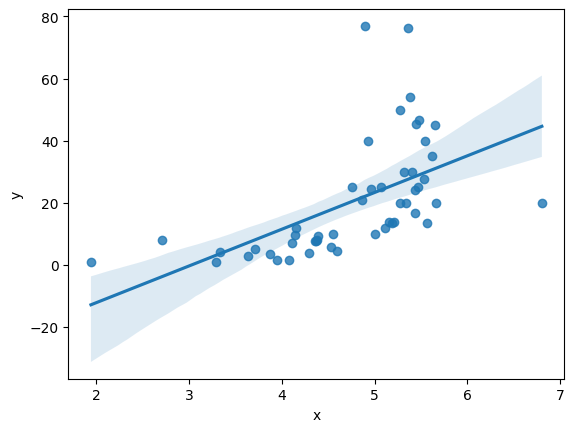

In [49]:
import seaborn as sns
d=data1[data1.y>0]
d['x']=np.log(d.x)
sns.regplot(x='x', y='y', data=d)

<Axes: ylabel='y'>

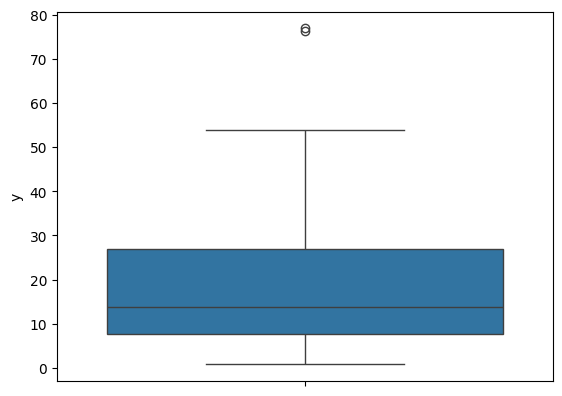

In [90]:
sns.boxplot(d['y'])

In [76]:
d['y'].describe()

count    50.000000
mean     20.573500
std      18.332769
min       0.800000
25%       7.570750
50%      13.774000
75%      26.934750
max      76.939000
Name: y, dtype: float64

18.723999999999997 7.5985 26.322499999999998
count    48.000000
mean     18.238083
std      14.530398
min       0.800000
25%       7.407250
50%      13.669500
75%      25.024500
max      53.890000
Name: y, dtype: float64


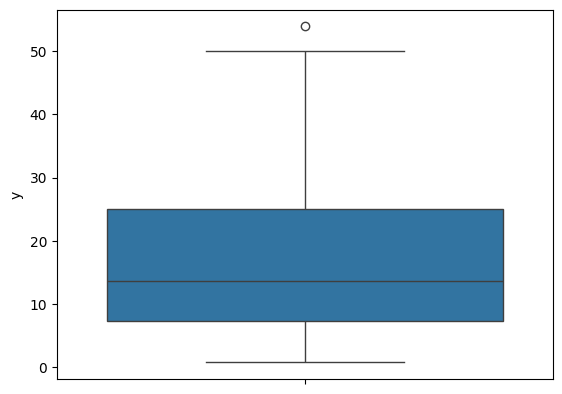

In [78]:
import numpy as np
Q1 = np.percentile(d['y'], 25, 
                   interpolation = 'midpoint')
Q3= np.percentile(d['y'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR, Q1, Q3)
dff1 = d[(d['y']<=(Q3+1.5*IQR)) & (d['y']>=(Q1-1.5*IQR))] 
sns.boxplot(dff1['y']) 
print(dff1['y'].describe())


<Axes: xlabel='x', ylabel='y'>

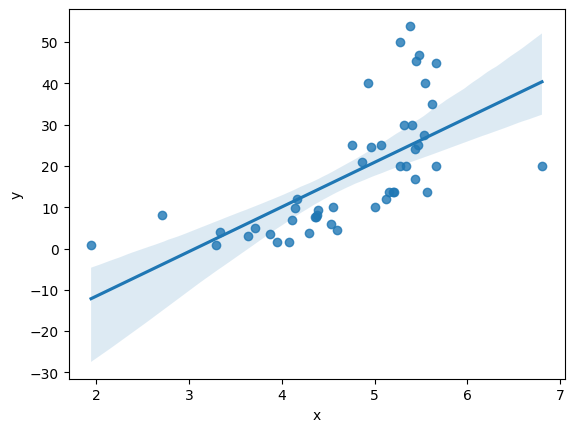

In [86]:
sns.regplot(x="x", y="y", data=dff1)
#x-дальность, у-стоимость